# Градиентный бустинг

Томашук Анна Э-2109

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sympy import symbols, diff

### Функция одной переменной

In [25]:
def f(x):
    return 3 * x ** 2

def df(x):
    return 6 * x

def gradient_descent(x0, lmbd):
    res = []
    while True:
        res.append([x0, f(x0)])
        x1 = x0 - lmbd * df(x0)
        if np.linalg.norm(x1 - x0) < 0.00000001:
            break
        x0 = x1
    return np.array(res)

In [26]:
x0 = 5
lmbd = 0.1

res_1 = gradient_descent(x0, lmbd)

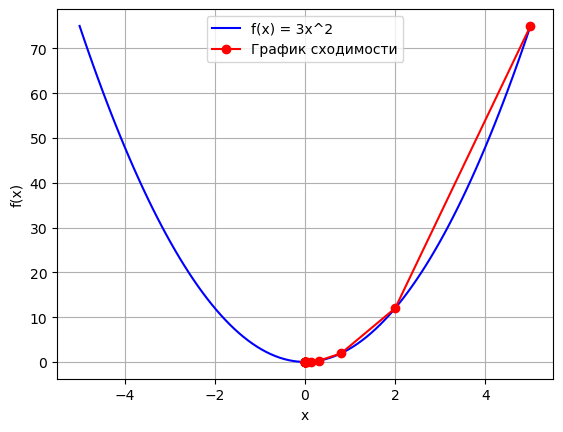

In [27]:
x = np.linspace(-5, 5, 100)
y = f(x)

res_1_x = res_1[:, 0]
res_1_y = res_1[:, 1]

# график
plt.figure()
plt.plot(x, y, label='f(x) = 3x^2', color='b')
plt.plot(res_1_x, res_1_y, marker='o', label='График сходимости', color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

**Метод наискорейшего спуска**

In [28]:
from scipy.optimize import minimize

x0 = 5

def lambda_function(lmbd):
    x1 = x0 - lmbd * df(x0)
    return f(x1)

initial_guess = 0  # начальное значение lmbd
result = minimize(lambda_function, initial_guess)

optimal_lmbd = result.x[0] # оптимальное значение lmbd

In [29]:
res_1_optimize = gradient_descent(x0, optimal_lmbd) # в ранее созданную функцию подставляем не произвольную, а оптимальную lmbd

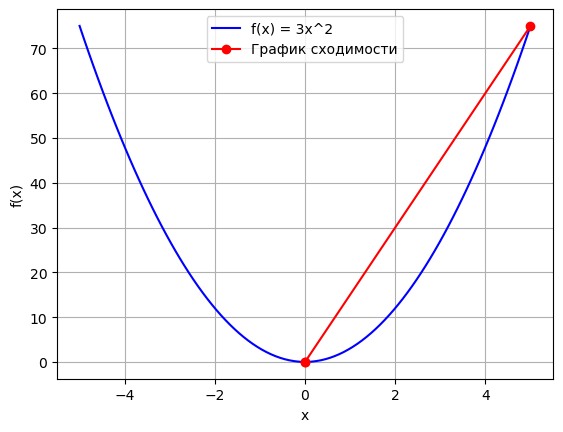

In [7]:
x = np.linspace(-5, 5, 100)
y = f(x)

res_1_optimize_x = res_1_optimize[:, 0]
res_1_optimize_y = res_1_optimize[:, 1]

# график
plt.figure()
plt.plot(x, y, label='f(x) = 3x^2', color='b')
plt.plot(res_1_optimize_x, res_1_optimize_y, marker='o', label='График сходимости', color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Таким образом, мы приходим в точку минимума за 1 итерацию.

### Функция двух переменных

In [48]:
def f(x, y):
    return 3 * x ** 2 + 5 * y**2

def df(x, y):
    return np.array([6 * x, 10 * y])

def gradient_descent_2(x0, y0, lmbd):
    res = []
    while True:
        res.append([x0, y0, f(x0, y0)])
        x1 = x0 - lmbd * df(x0, y0)[0]
        y1 = y0 - lmbd * df(x0, y0)[1]
        if np.linalg.norm([x1 - x0 , y1 - y0]) < 0.00000001:
            break
        x0 = x1
        y0 = y1
    return np.array(res)

In [49]:
x0 = 5
y0 = 10
lmbd = 0.1

res_2 = gradient_descent_2(x0, y0, lmbd)

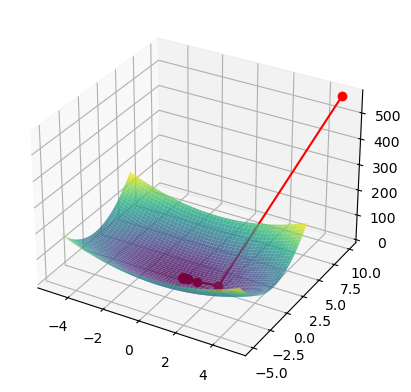

In [50]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# добавим линию сходимости, разделив массив координат
res_x = res_2[:, 0]
res_y = res_2[:, 1]
res_z = res_2[:, 2]

ax.plot(res_x, res_y, res_z, marker='o', color='r')

plt.show()

**Метод наискорейшего спуска**

In [52]:
x0 = 5
y0 = 10

def lambda_function_2(lmbd):
    x1 = x0 - lmbd * df(x0, y0)[0]
    y1 = y0 - lmbd * df(x0, y0)[1]
    return f(x1, y1)

initial_guess = 0  # начальное значение lmbd
result = minimize(lambda_function_2, initial_guess)

optimal_lmbd = result.x[0] # оптимальное значение lmbd

In [53]:
# в ранее созданную функцию подставляем не произвольную, а оптимальную lmbd
res_2_optimize = gradient_descent_2(x0, y0, optimal_lmbd) 

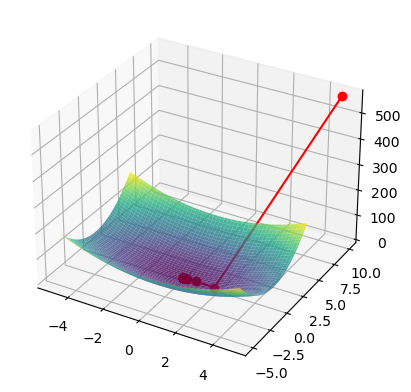

In [54]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# добавим линию сходимости, разделив массив координат
res_2_optimize_x = res_2_optimize[:, 0]
res_2_optimize_y = res_2_optimize[:, 1]
res_2_optimize_z = res_2_optimize[:, 2]

ax.plot(res_2_optimize_x, res_2_optimize_y, res_2_optimize_z, marker='o', color='r')

plt.show()

In [56]:
len(res_2)

23

In [57]:
len(res_2_optimize)

22

Таким образом, методом наискорейшего спуска минимум функции 2ух переменных был найден за 22 итерации, в то время, как при использовании обычного градиентного спуска точка была найдена за 23 итерации.